##Import Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###Import Data

In [67]:
messages = pd.read_csv('spam.csv',sep=',',encoding= 'ISO-8859-1')
messages.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [68]:
messages = messages.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
messages = messages.rename(columns={'v1':'label','v2':'message'})
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


###Exploratory Data Analysis

In [69]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's make a new column to detect how long the text messages are:

In [70]:
messages['length']=messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


###Data Visualization


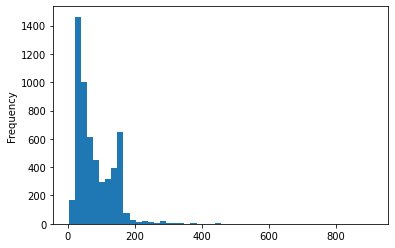

In [71]:
messages['length'].plot(bins=50,kind='hist')

In [72]:
messages['length'].describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

Woah! 910 characters,seems like an article!

In [73]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Well seems like romeo sending texts!

##Text Pre-processing


Removing punctuation using python's built-in string library

In [74]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [77]:
def text_processing(message):
  nopunc = [char for char in message if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stop]

In [78]:
messages['message'].head(5).apply(text_processing)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

###Text Conversion

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(messages['message'])
print(len(bow_transformer.vocabulary_))

11304


In [81]:
msg4 = messages['message'][3]
print(msg4)

U dun say so early hor... U c already then say...


In [82]:
bow4=bow_transformer.transform([msg4])
print(bow4)
print(bow4.shape)

  (0, 3996)	2
  (0, 4551)	1
  (0, 5179)	1
  (0, 6118)	1
  (0, 6136)	1
  (0, 7091)	1
  (0, 9445)	2
(1, 11304)


In [83]:
print(bow_transformer.get_feature_names()[3996])

U


U is at 3996th dimension in vector 

### we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages.

In [84]:
messages_bow = bow_transformer.transform(messages['message'])

In [85]:
print('Shape of Sparse Matrix: ',messages_bow.shape)
print('Amount of non-zero occurences:',messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11304)
Amount of non-zero occurences: 50193


Applying Tf-idf to the bow and assigning weights to the all words in all the docs 

In [86]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_messages = TfidfTransformer().fit(messages_bow)

applying tf-idf on doc4

In [87]:
tfidf4 = tfidf_messages.transform(bow4)
print(tfidf4)

  (0, 9445)	0.5391515179363724
  (0, 7091)	0.438375519235493
  (0, 6136)	0.3183143011307023
  (0, 6118)	0.2991551295536476
  (0, 5179)	0.2969195675145299
  (0, 4551)	0.26585776633899993
  (0, 3996)	0.40924708612713756


In [88]:
messages_tfidf = tfidf_messages.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11304)


###checking for the word u and university in the tfidf weights

In [89]:
print(tfidf_messages.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_messages.idf_[bow_transformer.vocabulary_['university']])

3.288863056423095
8.527076498901426


##Model Building

In [91]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(messages_tfidf,messages['label'])


predicting the 4th message

In [95]:
print('predicted: ',model.predict(tfidf4)[0])
print('excepted: ',messages['label'][3])

predicted:  ham
excepted:  ham


### Model Evaluation

In [96]:
all_predictions = model.predict(messages_tfidf)
print(all_predictions)


['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [99]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(messages['label'],all_predictions))
print(confusion_matrix(messages['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 114  633]]


###Train Test Split

In [101]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['label'],test_size=0.2)

In [102]:
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


###Creating a Data Pipeline

In [104]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_processing)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [105]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7fc6b11ff5f0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [106]:
predictions = pipeline.predict(msg_test)

In [107]:
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1001
        spam       0.72      1.00      0.84       114

    accuracy                           0.96      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.97      0.96      0.96      1115

